

Na tarefa anterior se fixo unha pequena base de datos con caras. Neste caso se trata de facer unha aplicación de consola que cargue esa base de datos e tente identificar as caras presentes.

Á saída debera escribir os nomes das persoas que foi capaz de identificar e o número de persoas que non foi capaz de poñerlle nome.


Para salvar e cargar as caras:

import pandas as pd
display(",".join(face_descriptorPhill.astype(str)))
csv = pd.DataFrame(data={'nome':['Phill'], 'fingerprint':[",".join(face_descriptorPhill.astype(str))]})
display(csv)

csv.to_csv('proba.csv')

leido = pd.read_csv('proba.csv')
display(leido)
leido["f2"] = leido.apply(lambda row: np.array(row['fingerprint'].split(',')).astype(np.float64), axis=1)




### Importación de librerías y imagen grupal

In [33]:
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

imagen_grupal = cv2.imread("sam-frodo-gollum.png")
imaxeTodosColor = cv2.cvtColor(imagen_grupal, cv2.COLOR_BGR2RGB)

### Cargar modelos de DLib

In [34]:

predictor_path ="./shape_predictor_5_face_landmarks.dat"
face_rec_model_path = "./dlib_face_recognition_resnet_model_v1.dat"


detector = dlib.get_frontal_face_detector()
sp = dlib.shape_predictor(predictor_path)
facerec = dlib.face_recognition_model_v1(face_rec_model_path)

### Leer base de datos y listas de vectores y nombres

In [35]:
archivo = "caras.csv" # Aquí están almacenadas las caras de Frodo y Gollum (Sam no)
df = pd.read_csv(archivo, header=None, names=["nombre", "fingerprint"], dtype=str)
df = df.dropna()

# Convertir fingerprints a arrays NumPy
df["vector"] = df["fingerprint"].apply(lambda x: np.array(x.split(",")).astype(np.float64) if isinstance(x, str) else np.zeros(128))



known_face_names = df["nombre"].tolist()
known_face_encodings = df["vector"].tolist()

face_names = []

### Detectar caras en imagen grupal

In [36]:
face_names = []
tolerancia = 0.6

dets = detector(imaxeTodosColor, 1)

for d in dets:
    shape = sp(imaxeTodosColor, d)
    face_descriptor = np.array(facerec.compute_face_descriptor(imaxeTodosColor, shape))

    # Comparar con caras conocidas
    matches = [(np.linalg.norm(face_descriptor - np.array(known_face_encodings[i])), known_face_names[i])
               for i in range(len(known_face_encodings))
               if np.linalg.norm(face_descriptor - np.array(known_face_encodings[i])) <= tolerancia]

    # Asignar el nombre o "Desconocido"
    if matches:
        carasOrdenadas = sorted(matches, key=lambda x: x[0]) 
        face_names.append(((d.top(), d.right(), d.bottom(), d.left()), carasOrdenadas[0][1]))
    else:
        face_names.append(((d.top(), d.right(), d.bottom(), d.left()), "Desconocido"))

### Dibujar recuadros sobre la foto grupal

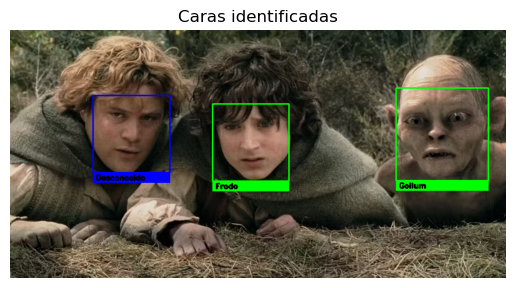

In [37]:
imaxeConMarcas = imaxeTodosColor.copy()
for (top, right, bottom, left), name in face_names:
    color = (0, 255, 0) if name != "Desconocido" else (0, 0, 255)
    
    cv2.rectangle(imaxeConMarcas, (left, top), (right, bottom), color, 2)
    cv2.rectangle(imaxeConMarcas, (left, bottom + 20), (right, bottom), color, cv2.FILLED)
    
    font = cv2.FONT_HERSHEY_DUPLEX
    cv2.putText(imaxeConMarcas, name, (left + 6, bottom + 15), font, 0.5, (0, 0, 0), 2)

plt.imshow(imaxeConMarcas)
plt.title('Caras identificadas')
plt.axis('off')
plt.show()